In [1]:
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# sklearn imports
from sklearn import linear_model
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer




In [2]:
df = pd.read_csv('data/final.csv')
df.head(20)

,name,games,gameStarted,minPlayed,fieldGoals,fieldGoalsAttemp,fieldGoalsPerc,point2_Goals,point2_Attemp,point2_Perc,point3_Goals,point3_Attemp,point3_Perc,freeThrows,freeThrowsAttemp,freeThrowsPerc,offensRebounds,deffensRebounds,draft
0,A'Mari McCray,5.0,2.0,20.0,2.8,7.0,0.400,2.2,5.8,0.379,0.6,1.2,0.500,0.2,1.8,0.111,1.8,2.4,0
1,A'uston Calhoun,99.0,82.0,28.8,5.3,11.8,0.454,4.9,10.4,0.474,0.4,1.3,0.293,2.4,3.3,0.741,2.1,4.0,0
2,A.J. Abrams,144.0,108.0,32.5,4.6,11.3,0.407,1.9,4.5,0.419,2.7,6.8,0.399,1.8,2.1,0.864,0.5,1.8,0
3,A.J. Astroth,71.0,25.0,15.1,1.5,3.4,0.446,1.3,2.6,0.516,0.2,0.8,0.224,1.0,1.6,0.622,1.3,2.5,0
4,A.J. Atkinson,44.0,1.0,2.1,0.2,0.4,0.438,0.1,0.2,0.625,0.0,0.2,0.250,0.1,0.1,0.600,0.1,0.3,0
5,A.J. Avery,111.0,32.0,13.3,1.2,2.7,0.457,1.2,2.6,0.459,0.0,0.1,0.400,1.0,1.5,0.658,1.3,1.9,0
6,A.J. Banks,65.0,48.0,23.7,1.7,3.5,0.498,1.4,2.4,0.557,0.4,1.0,0.358,1.2,1.7,0.722,0.3,2.5,0
7,A.J. Bowers,14.0,0.0,5.3,0.2,0.3,0.750,0.2,0.2,1.000,0.0,0.1,0.000,0.1,0.1,1.000,0.4,0.6,0
8,A.J. Burch,6.0,0.0,2.3,0.0,0.7,0.000,0.0,0.5,0.000,0.0,0.2,0.000,0.3,0.7,0.500,0.0,0.8,0
9,A.J. Caldwell,101.0,23.0,22.6,1.7,4.1,0.413,0.7,1.4,0.493,1.0,2.7,0.372,0.2,0.4,0.537,0.5,2.7,0


# In our project, we used supervised machine learning
#### We will build a model to predict if a player will be picked at 1-st draft or not.
####  First, we splitted our model to train and test. Our test feautre is the 'Draft' column.


In [3]:
df_copy = df.copy()
df_copy["rebounds"] = df_copy["offensRebounds"] + df_copy["deffensRebounds"]
df_copy.drop(axis=1,columns=['name','offensRebounds','deffensRebounds'],inplace=True)

In [4]:
X=df_copy[df_copy.columns[df_copy.columns != 'draft']]
y=df_copy['draft']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#### We used standard and minmax scalers: 

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [6]:
print("Mean: ", X_train_scaled.mean(axis=0))
print("Standard Deviation: ", X_train_scaled.std(axis=0))

Mean:  [ 4.43621103e-17  2.70781712e-17  2.32180915e-16 -3.80246660e-17
  1.07736554e-16  4.89423542e-16  1.27036952e-16  1.10329144e-16
 -4.46501760e-16  1.68518406e-17  1.41728300e-16  1.39999907e-16
 -1.12345604e-17  2.79423682e-17 -1.90699461e-16  3.31275499e-17]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)
print("Mean: ", X_test_scaled.mean(axis=0))
print("Standard Deviation: ", X_test_scaled.std(axis=0))

Mean:  [ 3.72120544e-02  2.88165169e-02  1.90270159e-03  1.13246991e-02
  9.01246170e-03  1.60533106e-02  1.69561359e-02  1.72585432e-02
  4.11188745e-03 -5.59945414e-03 -5.23712269e-03  1.26254666e-02
  1.97116296e-02  1.54012139e-02  1.76579963e-05  1.14209443e-02]
Standard Deviation:  [0.99666235 1.01063394 1.00357343 1.01155132 1.01434316 0.97677944
 1.01956222 1.02356778 0.96803607 1.00779821 1.00574769 0.98805973
 1.03637455 1.0396561  1.00546316 1.00241734]


In [8]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_in_range = min_max_scaler.fit_transform(X_train)
print("Min Value: ", X_train_scaled_in_range.min(axis=0))
print("Max Value: ", X_train_scaled_in_range.max(axis=0))
X_test_scaled_in_range = min_max_scaler.transform(X_test)

Min Value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max Value:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## The prediction algorithm:

In [9]:
clf_model = LogisticRegression().fit(X_train, y_train)

C:\Users\vikvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
y_pred=clf_model.predict(X_test)  #logistic

In [11]:
res_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
res_df["correct"]=abs((res_df["Actual"]^res_df["Predicted"])-1)
res_df[res_df["correct"]==1]
res_df

,Actual,Predicted,correct
9453,0,0,1
7873,0,0,1
10857,0,0,1
12929,0,0,1
13082,0,0,1
...,...,...,...
8727,0,0,1
3776,0,0,1
5437,0,0,1
5163,0,0,1


In [12]:
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

print("correct:",len(res_df[res_df["correct"]==1]))
print("total:",len(res_df))
print("correct %:",len(res_df[res_df["correct"]==1])/len(res_df))

Initial amount of samples: #15417
Number of training samples: #12333
Number of test samples: #3084

Target distribution in original dataset:
0    15186
1      231
Name: draft, dtype: int64

Target distribution in the training set:
0    12149
1      184
Name: draft, dtype: int64

Target distribution in the test set:
0    3037
1      47
Name: draft, dtype: int64
correct: 3039
total: 3084
correct %: 0.9854085603112841


### Results:

In [13]:
print("accuracy is:",metrics.accuracy_score(y_test, y_pred))
print("precision is:",metrics.precision_score(y_test, y_pred))


accuracy is: 0.9854085603112841
precision is: 0.75


### Another machine-learning algorithm – KNN:

In [14]:
k = 2
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
y_pred=clf.predict(X_test)

print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

[[3032    5]
 [  45    2]]
Accuracy =  0.98378728923476


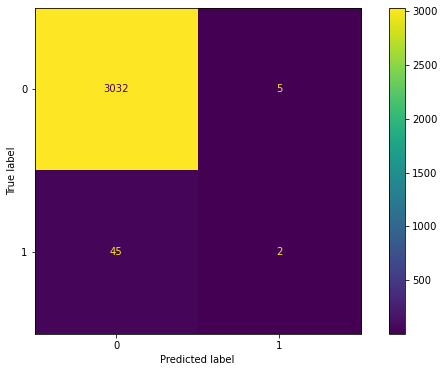

In [16]:
plot_confusion_matrix(clf, X_test,y_test)